In [2]:
import fastf1 as ff1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
ff1.Cache.enable_cache('cache')
import numpy as np


In [3]:
session = ff1.get_session(2023, 'Suzuka', 'R')
session.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.1.2]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           I

In [196]:
session.laps.base_class_view.groupby(['Driver','Stint'])['LapNumber'].min()['OCO']

Stint
1.0     1.0
2.0     2.0
3.0    29.0
Name: LapNumber, dtype: float64

In [194]:
session.laps.base_class_view.groupby(['Driver','Stint'])['LapNumber'].min()['NOR']

Stint
1.0     1.0
2.0    18.0
3.0    37.0
Name: LapNumber, dtype: float64

In [197]:
session.laps.base_class_view

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:05:04.326000,VER,1,NaT,1.0,1.0,0 days 00:16:44.659000,NaT,NaT,0 days 00:00:49.276000,...,True,Red Bull Racing,0 days 01:03:03.844000,2023-09-24 05:04:05.253,24,1.0,False,,False,False
1,0 days 01:07:48.688000,VER,1,NaT,2.0,1.0,NaT,NaT,0 days 00:01:05.251000,0 days 00:01:08.600000,...,True,Red Bull Racing,0 days 01:05:04.326000,2023-09-24 05:06:05.735,4,1.0,False,,False,False
2,0 days 01:10:34.016000,VER,1,NaT,3.0,1.0,NaT,NaT,0 days 00:01:08.931000,0 days 00:01:08.363000,...,True,Red Bull Racing,0 days 01:07:48.688000,2023-09-24 05:08:50.097,4,1.0,False,,False,False
3,0 days 01:13:29.674000,VER,1,NaT,4.0,1.0,NaT,NaT,0 days 00:01:00.867000,0 days 00:01:06.499000,...,True,Red Bull Racing,0 days 01:10:34.016000,2023-09-24 05:11:35.425,4,1.0,False,,False,False
4,0 days 01:15:06.422000,VER,1,0 days 00:01:36.748000,5.0,1.0,NaT,NaT,0 days 00:00:34.900000,0 days 00:00:42.960000,...,True,Red Bull Racing,0 days 01:13:29.674000,2023-09-24 05:14:31.083,1,1.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0 days 01:38:11.659000,SAR,2,0 days 00:01:40.568000,18.0,3.0,NaT,NaT,0 days 00:00:36.475000,0 days 00:00:44.723000,...,True,Williams,0 days 01:36:31.091000,2023-09-24 05:37:32.500,1,18.0,False,,False,True
876,0 days 01:39:52.122000,SAR,2,0 days 00:01:40.463000,19.0,3.0,NaT,NaT,0 days 00:00:36.507000,0 days 00:00:44.784000,...,True,Williams,0 days 01:38:11.659000,2023-09-24 05:39:13.068,1,18.0,False,,False,True
877,0 days 01:41:33.290000,SAR,2,0 days 00:01:41.168000,20.0,3.0,NaT,NaT,0 days 00:00:36.632000,0 days 00:00:44.879000,...,True,Williams,0 days 01:39:52.122000,2023-09-24 05:40:53.531,1,18.0,False,,False,True
878,0 days 01:43:16.661000,SAR,2,0 days 00:01:43.371000,21.0,3.0,NaT,0 days 01:43:15.364000,0 days 00:00:36.434000,0 days 00:00:44.872000,...,True,Williams,0 days 01:41:33.290000,2023-09-24 05:42:34.699,1,17.0,False,,False,False


In [138]:
max_laps = session.laps.base_class_view.groupby('Driver')['LapNumber'].max().reset_index()
race_final_position = session.laps.base_class_view.merge(max_laps, on=['Driver', 'LapNumber'])[['Driver','Position']]
race_final_position = race_final_position.sort_values(by='Position')
race_final_position = {"Driver": race_final_position['Driver'].tolist()}
race_final_position

{'Driver': ['VER',
  'NOR',
  'PIA',
  'LEC',
  'HAM',
  'SAI',
  'RUS',
  'ALO',
  'OCO',
  'GAS',
  'LAW',
  'TSU',
  'ZHO',
  'STR',
  'HUL',
  'MAG',
  'ALB',
  'SAR',
  'PER',
  'BOT']}

In [141]:
df = session.laps.base_class_view[['Driver','Team', 'LapTime', 'LapNumber', 'Stint','Compound', 'TyreLife']]
df['LapTime_seconds'] = df['LapTime'].dt.total_seconds()
avg_times = df.groupby('Driver')['LapTime_seconds'].mean().sort_values()

df['stint_compound']= df['Compound'] + '_' +df['Stint'].astype('str')
df = df.sort_values(by=['Stint'])
colors = {}
for sint_compound in df['stint_compound'].unique():
    if 'HARD' in sint_compound:
        colors[sint_compound] = 'black'
    elif 'MEDIUM' in sint_compound:
        colors[sint_compound] = 'yellow'
    elif 'SOFT' in sint_compound:
        colors[sint_compound] = 'red'
    else:
        colors[sint_compound] = 'purple'



In [193]:
import plotly.express as px

# Création du boxplot avec plotly
fig = px.box(
    df,
    x="Driver",
    y="LapTime_seconds",
    color="stint_compound",
    category_orders=race_final_position,  # pour ordonner les pilotes
    color_discrete_map=colors,  # utilisez votre dictionnaire de couleurs
    title='Boxplot of Lap Times by Driver and Stint',
    labels={"LapTime_seconds": "Lap Time (seconds)", "Driver": "Driver"},
    points=False,    
    )
fig.update_layout(xaxis_tickangle=-45,yaxis_range=[80, 105])


fig.update_layout(xaxis_tickangle=-45,yaxis_range=[df['LapTime_seconds'].min(), 105])

# Calculate the minimum lap time for positioning annotations
min_time = df['LapTime_seconds'].min()

"""# Loop through unique drivers and stints to add annotations
for driver in df['Driver'].unique():
    for stint in df['stint_compound'].unique():
        # Calculate the positioning offset based on the number of unique stints
        # This is to ensure that annotations for different stints don't overlap
        offset = list(df['stint_compound'].unique()).index(stint) 

        fig.add_annotation(
            text='toto',
            x=driver,
            y=min_time - 5 - offset,  # Adjust this based on your specific data for positioning
            xanchor="center",
            showarrow=False,
            font=dict(color="black")
        )"""

fig.show()


In [169]:
import plotly.express as px

# Création du boxplot avec plotly
fig = px.box(
    df,
    x="Driver",
    y="LapTime_seconds",
    category_orders=race_final_position,
    #color="Stint",
    #category_orders={"Driver": avg_times.index.tolist()},  # pour ordonner les pilotes
    #color_discrete_map={'SOFT':'red','MEDIUM':'yellow','HARD':'black','TEST_UNKNOWN':'purple'},  # utilisez votre dictionnaire de couleurs
    title='Boxplot of Lap Times by Driver and Stint',
    labels={"LapTime_seconds": "Lap Time (seconds)", "Driver": "Driver"},
    points='all',    
    )
# Rotation des labels de l'axe x
fig.update_layout(xaxis_tickangle=-45,yaxis_range=[df['LapTime_seconds'].min(), 105])

#yaxis_range=[df['LapTime_seconds'].min(), 105]
# Affichage du graphique
fig.show()

In [38]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:20.851000,0 days 00:01:19.092000,0 days 00:01:25.858000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,2.0,,NaN,0 days 00:01:22.730000,0 days 00:01:20.305000,0 days 00:01:27.102000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,3.0,,NaN,0 days 00:01:21.481000,0 days 00:01:19.776000,0 days 00:01:27.286000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,4.0,,NaN,0 days 00:01:21.554000,0 days 00:01:20.426000,0 days 00:01:27.627000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,5.0,,NaN,0 days 00:01:21.798000,0 days 00:01:20.098000,0 days 00:01:27.893000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,2293D1,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,6.0,,NaN,0 days 00:01:22.114000,0 days 00:01:20.406000,0 days 00:01:27.945000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,7.0,,NaN,0 days 00:01:21.998000,0 days 00:01:19.347000,0 days 00:01:28.046000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,8.0,,NaN,0 days 00:01:22.248000,0 days 00:01:19.856000,0 days 00:01:29.294000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,9.0,,NaN,0 days 00:01:22.190000,0 days 00:01:19.659000,0 days 00:01:31.349000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,10.0,,NaN,0 days 00:01:21.938000,0 days 00:01:18.725000,NaT,NaT,,NaN


In [16]:
df = session.results[['Abbreviation','Q3']].iloc[0:9]
df['LapTime_seconds'] = df['Q3'].dt.total_seconds()
df = df.sort_values(by=['LapTime_seconds'])
df['LapTime_seconds_to_best'] = df['LapTime_seconds'] - min(df['LapTime_seconds'])


In [18]:
df

,Abbreviation,Q3,LapTime_seconds,LapTime_seconds_to_best
1,VER,NaT,NaN,NaN
81,PIA,NaT,NaN,NaN
4,NOR,NaT,NaN,NaN
16,LEC,NaT,NaN,NaN
11,PER,NaT,NaN,NaN
55,SAI,NaT,NaN,NaN
44,HAM,NaT,NaN,NaN
63,RUS,NaT,NaN,NaN
22,TSU,NaT,NaN,NaN


In [17]:
fig = go.Figure(
    data=[
        go.Bar(
            y=df["LapTime_seconds_to_best"],
            x=df["Abbreviation"],
            marker=dict(
                color=df["LapTime_seconds_to_best"],
                colorscale="Blues",
                colorbar=dict(title="LapTime_seconds_to_best"),
            ),
        )
    ]
)

fig.show()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.1.2]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

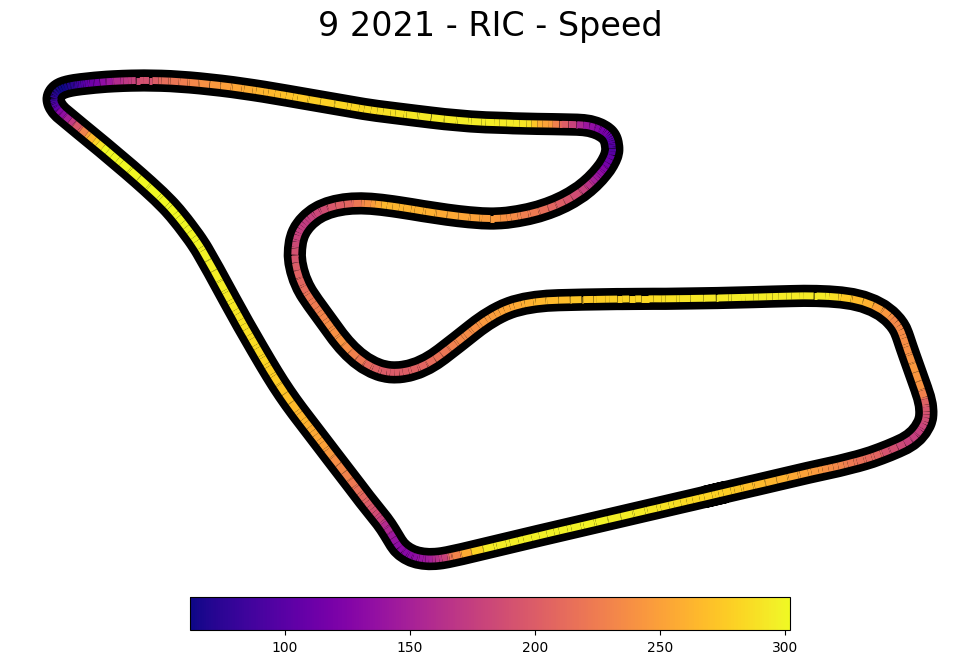

In [99]:
"""Speed visualization on track map
======================================

(Example provided by @JSEHV on Github)
"""
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma


##############################################################################
# Next, we load the session and select the desired data.
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


##############################################################################
# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


##############################################################################
# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()


In [107]:
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)


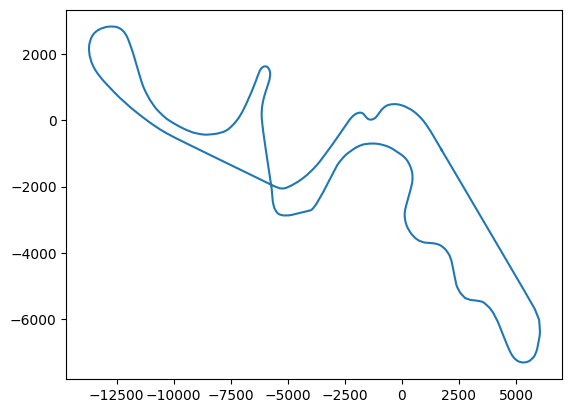

In [227]:
lap = session.laps.pick_driver('LEC').pick_lap(50)
plt.plot(lap.telemetry['X'], lap.telemetry['Y'])

In [218]:
session.laps.pick_driver('LEC').pick_lap(50).get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-09-24 06:29:16.954,0 days 02:28:15.545000,,467.969167,0 days 00:00:00,10769,267,7,99,False,0,interpolation,-0.014879,-0.000003,OnTrack,1719,-868,739
3,2023-09-24 06:29:17.084,0 days 02:28:15.675000,,467.969167,0 days 00:00:00.130000,10859,267,7,99,False,0,car,9.641667,0.001668,OnTrack,1781,-939,739
4,2023-09-24 06:29:17.324,0 days 02:28:15.915000,81,467.969167,0 days 00:00:00.370000,10944,272,7,99,False,0,car,27.775000,0.004806,OnTrack,1881,-1057,735
5,2023-09-24 06:29:17.396,0 days 02:28:15.987000,81,468.774722,0 days 00:00:00.442000,10981,273,7,99,False,0,pos,33.259473,0.005755,OnTrack,1910,-1090,734
6,2023-09-24 06:29:17.524,0 days 02:28:16.115000,81,469.580278,0 days 00:00:00.570000,11019,275,7,99,False,0,car,43.052778,0.007449,OnTrack,1957,-1144,732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2023-09-24 06:30:54.136,0 days 02:29:52.727000,81,504.952222,0 days 00:01:37.182000,10618,260,6,100,False,0,pos,5732.425644,0.991881,OnTrack,1479,-585,753
737,2023-09-24 06:30:54.164,0 days 02:29:52.755000,81,506.546667,0 days 00:01:37.210000,10276,262,7,100,False,0,car,5734.481667,0.992237,OnTrack,1495,-604,752
738,2023-09-24 06:30:54.375,0 days 02:29:52.966000,81,508.346667,0 days 00:01:37.421000,10522,265,7,100,False,0,pos,5750.128520,0.994944,OnTrack,1646,-780,746
739,2023-09-24 06:30:54.524,0 days 02:29:53.115000,81,510.146667,0 days 00:01:37.570000,10768,268,7,100,False,0,car,5761.281667,0.996874,OnTrack,1733,-881,742


In [354]:
from scipy.interpolate import CubicSpline
import numpy as np

# Coordonnées du circuit
X = np.array(lap.telemetry['X'])  # Coordonnées X du circuit
Y = np.array(lap.telemetry['Y'])  # Coordonnées Y du circuit
Z = np.array(lap.telemetry['Z'])  # Coordonnées Z du circuit

# Paramètre t (distance le long du circuit)
t = np.linspace(0, 10000, len(X))

# Interpolation spline cubique
cs_X = CubicSpline(t, X)
cs_Y = CubicSpline(t, Y)
cs_Z = CubicSpline(t, Z)

# Générer des points interpolés (par exemple, tous les 1 mètre)
t_fine = np.linspace(0, 10000, 10000)
X_fine = cs_X(t_fine)
Y_fine = cs_Y(t_fine)
Z_fine = cs_Z(t_fine)

In [355]:
import numpy as np

def curvature(X, Y, Z, t):
    # Calcul des dérivées premières
    X_prime = np.gradient(X)
    Y_prime = np.gradient(Y)
    Z_prime = np.gradient(Z)
    
    # Calcul des dérivées secondes
    X_double_prime = np.gradient(X_prime)
    Y_double_prime = np.gradient(Y_prime)
    Z_double_prime = np.gradient(Z_prime)
    
    # Calcul du produit vectoriel des dérivées premières et secondes
    cross_product = np.cross([X_prime[t], Y_prime[t], Z_prime[t]], [X_double_prime[t], Y_double_prime[t], Z_double_prime[t]])
    norm_cross_product = np.linalg.norm(cross_product)
    
    # Calcul de la norme de la dérivée première
    norm_prime = np.linalg.norm([X_prime[t], Y_prime[t], Z_prime[t]])
    
    # Calcul de la courbure
    kappa = norm_cross_product / (norm_prime ** 3)
    
    return kappa

def sliding_window_curvature(X, Y, Z, t, window_size=2):
    # Sélectionner une sous-section du circuit basée sur la fenêtre glissante
    start = max(0, t - window_size)
    end = min(len(X), t + window_size + 1)
    X_sub = X[start:end]
    Y_sub = Y[start:end]
    Z_sub = Z[start:end]
    
    # Estimer la courbure pour cette sous-section
    kappa = curvature(X_sub, Y_sub, Z_sub, window_size)  # window_size est l'indice du point d'intérêt dans la sous-section
    
    return kappa

# Exemple d'utilisation
"""X = np.array(lap.telemetry['X'])  # Coordonnées X du circuit
Y = np.array(lap.telemetry['Y'])  # Coordonnées Y du circuit
Z = np.array(lap.telemetry['Z'])  # Coordonnées Z du circuit"""

X = X_fine
Y = Y_fine
Z = Z_fine


In [376]:
kappas =  curvatures
#kappas_normalized = (kappas - np.min(kappas)) / (np.max(kappas) - np.min(kappas))


# Créer un DataFrame pour faciliter la visualisation avec plotly
import pandas as pd
df = pd.DataFrame({
    'X': np.array(lap.telemetry['X']),
    'Y': np.array(lap.telemetry['Y']),
    'Courbure': kappas
})

# Créer un scatter plot avec plotly
fig = px.scatter(df, x='X', y='Y', color='Courbure', color_continuous_scale='Reds',
                 hover_data=['X', 'Y', 'Courbure'], title='Circuit avec Courbure')

# Afficher le plot
fig.show()

In [366]:
from geomdl import fitting
#from geomdl.visualization import VisMPL
from geomdl import utilities

# Coordonnées du circuit
X = np.array(lap.telemetry['X']) 
Y = np.array(lap.telemetry['Y'])

# Paramètre t (distance le long du circuit)
t = np.linspace(0, 5764, len(X))

# Interpoler les données avec une courbe B-spline
curve2D = fitting.interpolate_curve(list(zip(X, Y)), degree=3)

# Calculer la courbure
curvatures = utilities.curve_curvature(curve2D, t)

# Si vous souhaitez visualiser la courbe interpolée :
# curve2D.vis = VisMPL.VisCurve2D()
# curve2D.render()

# curvatures contient les valeurs de courbure pour chaque point t


AttributeError: module 'geomdl.utilities' has no attribute 'curve_curvature'

In [373]:
from scipy.interpolate import CubicSpline
import numpy as np

# Coordonnées du circuit
X = np.array(lap.telemetry['X']) 
Y = np.array(lap.telemetry['Y'])

# Paramètre t (distance le long du circuit)
t = np.linspace(0, 5600, len(X))

# Interpolation spline cubique pour X et Y
cs_X = CubicSpline(t, X)
cs_Y = CubicSpline(t, Y)

# Calculer les dérivées premières et secondes
Xp = cs_X.derivative(1)
Yp = cs_Y.derivative(1)
Xpp= cs_X.derivative(2)
Ypp = cs_Y.derivative(2)

# Calculer la courbure
curvatures = [(Xp(t)*Ypp(t) - Yp(t)*Xpp(t)) / (Xp(t)**2 + Yp(t)**2)**1.5 for t in range(len(X))]

# curvatures contient les valeurs de courbure pour chaque point t


In [374]:
curvatures

[-0.05703482683190034,
 -0.19038650222977255,
 -0.004984922672841847,
 -0.0010539518769973311,
 -0.0003927790258654863,
 -0.00019109174529817843,
 -0.000108103125520581,
 -6.686471723046502e-05,
 -4.322234729632158e-05,
 -2.7708188140774772e-05,
 -1.5766755144124966e-05,
 -4.446629484876924e-06,
 9.350699853975767e-06,
 3.110627036032026e-05,
 7.492205741739821e-05,
 0.00019026866335743466,
 0.0004131442550882682,
 0.000850973627470764,
 0.0016219883199160685,
 0.0023009216219664294,
 0.0013737002686397294,
 -0.0008368729921563201,
 -0.0016138556712845316,
 -0.0010369515760038192,
 -0.00046467478198819045,
 -0.0002593069871266861,
 -0.00016765488606844883,
 -0.00012138324787744567,
 -9.691431407107737e-05,
 -8.500672317087598e-05,
 -8.231214432466132e-05,
 -9.964817650295231e-05,
 -0.00011955241542655737,
 -0.0001293077549801146,
 -0.0001269801303789446,
 -0.0001141984510000207,
 -9.5040754057658e-05,
 -7.400624313948167e-05,
 -5.3662595347141874e-05,
 -2.9777167732097122e-05,
 -1.4608